In [77]:
!pip install Stellargraph

In [78]:
!pip install networkx==2.3

##Essential Dependencies/Libraries :

In [0]:
    import networkx as nx
    from networkx.algorithms import bipartite
    import matplotlib.pyplot as plt
    from sklearn.cluster import KMeans
    import numpy as np
    import warnings
    warnings.filterwarnings("ignore")
    import pandas as pd
    # you need to have tensorflow 
    from stellargraph.data import UniformRandomMetaPathWalk
    from stellargraph import StellarGraph

1. Read Graph from the given movie_actor_network.csv note that the graph is bipartite graph
2. using stellergaph and gensim packages, get the dense representation(128dimensional vector) of every node in the graph
3. Apply Clustering Algorithm to group similar actors

	a. For this task consider only the actor nodes <br>
	b. Apply any clustering algorithm of your choice <br>
	c. Choose the number of clusters for which you have maximum score of <b>$Cost1*F(Cost2)*Cost3$</b> where $F(x) = x*(1-x)$<br>
	
    Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br><br>
	Cost2 = $\frac{\text{max(number of actor nodes in cluster)}}{\text{total_number_of_actor_nodes}}$ <br><br>
    
	Cost3 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 
    
	<pre>
	for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
		algo = clustering_algorith(clusters=number_of_clusters)
        # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
		algo.fit(the dense vectors of actor nodes) 
		computer the metric Cost = Cost1*F(Cost2)*Cost3
	return number_of_clusters which have maximum Cost
	</pre>

	d. Fit the clustering algorithm with the opimal number_of_clusters and get the cluster number for each node<br>
	e. Convert the d-dimensional dense vectors of nodes into 2-dimensional using dimensionality reduction techniques (preferably TSNE)<br>
	f. Plot the 2d scatter plot, with the node vectors after step e and give colors to nodes such that same cluster nodes will have same color


4. Apply Clustering Algorithm to group similar movies

	a. for this task consider only the movie nodes
  
	b. apply any clustering algorithm of your choice
  
	c. choose the number of clusters for which you have maximum score of $Cost1*F(Cost2)*Cost3$ <br>

    Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br><br>
	Cost2 = $\frac{\text{max(number of movie nodes in cluster)}}{\text{total_number_of_movie_nodes}}$ <br><br>
	Cost3 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of movie nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(number of unique actor nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}$ where N= number of clusters 

	<pre>
	for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
		algo = clustering_algorith(clusters=number_of_clusters)
        # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
		algo.fit(the dense vectors of actor nodes) 
		computer the metric Cost = Cost1*(Cost2)*(1-Cost2)*Cost3
	return number_of_clusters which have maximum Cost
	</pre>

	d. Fit the clustering algorithm with the opimal number_of_clusters and get the cluster number for each node <br>
	e. Convert the d-dimensional dense vectors of nodes into 2-dimensional using dimensionality reduction techniques (preferably TSNE)<br>
	f. Plot the 2d scatter plot, with the node vectors after step e and give colors to nodes such that same cluster nodes will have same color
	


<img src='https://i.imgur.com/ZLWQEhL.jpg'>

### these links and function might be usefull while solving this assignment
1. what is bipartite graph: https://en.wikipedia.org/wiki/Bipartite_graph
2. Ego graph: https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.ego.ego_graph.html
3. Combining two are more graphs: https://stackoverflow.com/a/32652764/4084039
    ex: if you want to merge three graphs which are mentiond in the above image, you can write like this
    <pre>
    U=nx.Graph()
    for i in number of clusters:
        if U is empty:
            U.add_edges_from(ith Cluster's graph.edges(data=True))
            U.add_nodes_from(ith Cluster's graph.nodes(data=True)) 
        else:
            U.add_edges_from(ith Cluster's graph.edges(data=True)+U.edges(data=True))
            U.add_nodes_from(ith Cluster's graph.nodes(data=True)+U.nodes(data=True))
    </pre>
4. connected components:  https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.connected_components.html
5. Degree of a node: https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.degree.html
6. Neighbors of node: https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.Graph.neighbors.html

In [0]:
# hint: you can refer facebook case study notebook to solve this assignment in couple of hours
df = pd.read_csv('movie_actor_network.csv', index_col=False, names=['movie','actor'])

In [81]:
df.tail() #last record

,movie,actor
9645,m1380,a816
9646,m1380,a962
9647,m1381,a1225
9648,m1381,a1436
9649,m1381,a1926


In [82]:
df.shape

(9650, 2)

In [83]:
df.isna().sum() #checking the null values

movie    0
actor    0
dtype: int64

In [84]:
print('Unique values in Movie :',len(df['movie'].unique())); print('Unique values in actor : ', len(df['actor'].unique()))

Unique values in Movie : 1292
Unique values in actor :  3411


In [0]:
#storing all the edges to variable edge
edges = [tuple(x) for x in df.values.tolist()]

In [0]:
#now creating the bipartiate graph
B = nx.Graph()
B.add_nodes_from(df['movie'].unique(), bipartite=0, label='movie')
B.add_nodes_from(df['actor'].unique(), bipartite=1, label='actor')
B.add_edges_from(edges, label='acted')

###Simply connecting the component of bipartiate graph


In [0]:
A = list(nx.connected_component_subgraphs(B))[0] #component of bipartiate graph

In [88]:
print("number of nodes : ", A.number_of_nodes())
print("number of edges : ", A.number_of_edges()) #number of nodes

number of nodes :  4703
number of edges :  9650


###Using reference notebook visualizing the bipartiate graph


In [89]:
movies = []
actors = []
for i in A.nodes():
    if 'm' in i:
        movies.append(i)
    if 'a' in i:
        actors.append(i)
print('number of movies : ', len(movies))
print('number of actors :', len(actors))

number of movies :  1292
number of actors : 3411


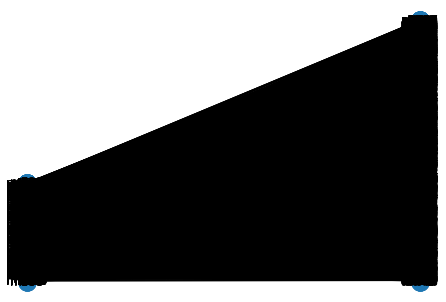

In [90]:
l, r = nx.bipartite.sets(A)
pos = {}

pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))

nx.draw(A, pos=pos, with_labels=True)
plt.show()

In [91]:
# Create the random walker
rw = UniformRandomMetaPathWalk(StellarGraph(A))

# specify the metapath schemas as a list of lists of node types.
metapaths = [
    ["movie", "actor", "movie"],
    ["actor", "movie", "actor"]
]

walks = rw.run(nodes=list(A.nodes()), # root nodes
               length=100,  # maximum length of a random walk
               n=1,        # number of random walks per root node 
               metapaths=metapaths
              )

#%timeit walks
print("Number of random walks: {}".format(len(walks)))

Number of random walks: 4703


In [92]:
%timeit walks

10000000 loops, best of 3: 22.7 ns per loop


In [0]:
from gensim.models import Word2Vec
model = Word2Vec(walks, size=128, window=5)

In [94]:
model.wv.vectors.shape  # 128-dimensional vector for each node in the graph

(4703, 128)

In [0]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index2word  # list of node IDs
node_embeddings = model.wv.vectors  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = [ A.node[node_id]['label'] for node_id in node_ids]

In [96]:
  node_targets[:5]

['actor', 'actor', 'actor', 'actor', 'actor']

####Now simply collecting all the ind of movies and actors

In [0]:
#Store the nodes
actor_list = []
movie_list = []
for x in range(len(node_ids)):
  if 'a' in node_ids[x]:
    actor_list.append(node_ids[x])
  else:
    movie_list.append(node_ids[x])


In [0]:
actor_vector = []
movie_vector = []
for x in range(len(node_ids)):
  if 'a' in node_ids[x]:
    actor_vector.append(node_embeddings[x])
  else:
    movie_vector.append(node_embeddings[x])

In [99]:
#Return an array of zeros with shape and type of input
'''
movie_vector = np.zeros([0,128])
actor_vector = np.zeros([0,128])
for i in movie_list:
    row = node_embeddings[i].reshape(1,-1)
    movie_vector = np.vstack((movie_vector, row))
actor_acotr_vector
#for actor 
for i in actor_list:
    row = node_embeddings[i].reshape(1,-1)
    actor_vector = np.vstack((actor_vector, row))
movie_vector = movie_vector
'''

'\nmovie_vector = np.zeros([0,128])\nactor_vector = np.zeros([0,128])\nfor i in movie_list:\n    row = node_embeddings[i].reshape(1,-1)\n    movie_vector = np.vstack((movie_vector, row))\nactor_acotr_vector\n#for actor \nfor i in actor_list:\n    row = node_embeddings[i].reshape(1,-1)\n    actor_vector = np.vstack((actor_vector, row))\nmovie_vector = movie_vector\n'

In [100]:
from tqdm import tqdm
cluster = [3, 5, 10, 30, 50, 100, 200, 500] #cluster
for number_of_clusters in tqdm(cluster):
  k_cluster = KMeans(n_clusters = number_of_clusters).fit(movie_vector)
  df_movie = k_cluster.labels_
  dict_ = {} #Dictionary for each movie
  for i in range(len(movie_list)):
    if(df_movie[i] not in dict_):
      dict_[(df_movie[i])] = [movie_list[i]]
    else:
      dict_[(df_movie[i])].append(movie_list[i])
  #**********calulating the cost values**********   
  c1 = 0
  c2 = 0    #c1 and c2 cost values                            
  for i in dict_: 
    #Combining the graphs
    U = nx.Graph()                      
    list_ = dict_[i]                       
    for n in list_:                                                                                                                           
      final_graph_ = nx.ego_graph(A, n, 1)   #graph A and node n                              
      U.add_edges_from(final_graph_.edges())
      U.add_nodes_from(final_graph_.nodes())
#https://www.programcreek.com/python/example/89589/networkx.number_connected_components
    c1 += len(max(nx.connected_components(U)))/(nx.number_of_nodes(U))
    c2 += nx.number_of_edges(U)/(nx.number_of_nodes(U) - len(list_))     
  c1 /= number_of_clusters
  c2 /= number_of_clusters 
  total_cost = c1 * c2   
  print("Cluster:", number_of_clusters,"***** total_cost :",total_cost)

 12%|█▎        | 1/8 [00:00<00:04,  1.48it/s]

Cluster: 3 ***** total_cost : 2.7107531845210993


 25%|██▌       | 2/8 [00:01<00:04,  1.37it/s]

Cluster: 5 ***** total_cost : 2.803506087005399


 38%|███▊      | 3/8 [00:02<00:03,  1.29it/s]

Cluster: 10 ***** total_cost : 1.9883861878197835


 50%|█████     | 4/8 [00:03<00:03,  1.15it/s]

Cluster: 30 ***** total_cost : 2.053143681845816


 62%|██████▎   | 5/8 [00:04<00:03,  1.04s/it]

Cluster: 50 ***** total_cost : 1.7817911581329433


 75%|███████▌  | 6/8 [00:07<00:02,  1.39s/it]

Cluster: 100 ***** total_cost : 1.590967315202081


 88%|████████▊ | 7/8 [00:10<00:02,  2.02s/it]

Cluster: 200 ***** total_cost : 1.376792727071648


100%|██████████| 8/8 [00:17<00:00,  2.25s/it]

Cluster: 500 ***** total_cost : 1.2044596271431331


In [101]:
df_movie.size

1292

In [102]:
print(dict_[0])

['m1329', 'm1337', 'm1324', 'm696', 'm1356', 'm1332']


--->Dimensionality reduction

In [0]:
k_cluster = KMeans(n_clusters = 3).fit(movie_vector)
df_movie = k_cluster.labels_

In [0]:
from sklearn.manifold import TSNE
transform = TSNE #PCA
trans_ = transform(n_components = 2)
node_embeddings_2d = trans_.fit_transform(movie_vector)

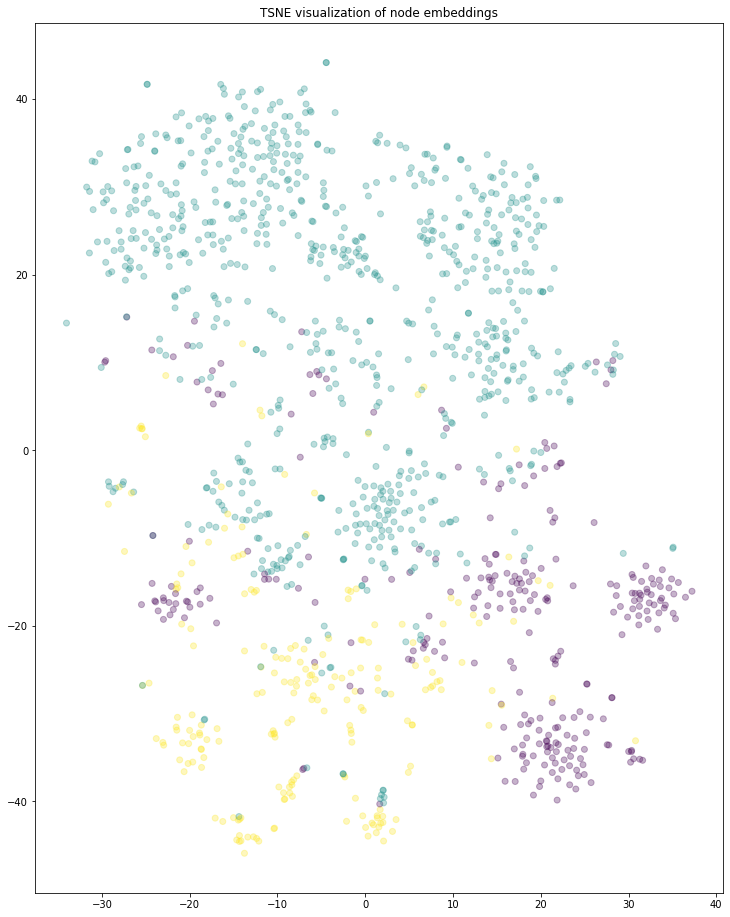

In [105]:
import numpy as np
# draw the points

label_map = { l: i for i, l in enumerate(np.unique(df_movie))}
node_colours = [ label_map[target] for target in df_movie]

plt.figure(figsize=(20,16))
plt.axes().set(aspect="equal")
plt.scatter(node_embeddings_2d[:,0], 
            node_embeddings_2d[:,1], 
            c=node_colours, alpha=0.3)
plt.title('{} visualization of node embeddings'.format(transform.__name__))

plt.show()

###Apply for the actor node

In [106]:
from tqdm import tqdm
cluster = [3, 5, 10, 30, 50, 100] #cluster
for number_of_clusters in tqdm(cluster):
  k_cluster = KMeans(n_clusters = number_of_clusters).fit(actor_vector)
  df_actor = k_cluster.labels_
  dict_ = {} #Dictionary for each movie
  for i in range(len(actor_list)):
    if(df_actor[i] not in dict_):
      dict_[(df_actor[i])] = [actor_list[i]]
    else:
      dict_[(df_actor[i])].append(actor_list[i])
  c1 = 0
  c2 = 0  #c1 and c2 cost values                            
  for i in dict_:                       
    list_ = dict_[i]                       
    #Combining the graphs
    U = nx.Graph()
    for n in list_:                                                                                                                           
      final_graph_ = nx.ego_graph(A, n)   #graph A and node n                              
      U.add_edges_from(final_graph_.edges())
      U.add_nodes_from(final_graph_.nodes())
#https://www.programcreek.com/python/example/89589/networkx.number_connected_components
    c1 += len(max(nx.connected_components(U)))/(nx.number_of_nodes(U))
    c2 += nx.number_of_edges(U)/(nx.number_of_nodes(U) - len(list_))     
  c1 /= number_of_clusters
  c2 /= number_of_clusters 
  total_cost = c1 * c2   
  print("cluster:", number_of_clusters,"***** total_cost :",total_cost)

 17%|█▋        | 1/6 [00:00<00:04,  1.03it/s]

cluster: 3 ***** total_cost : 3.816541764945768


 33%|███▎      | 2/6 [00:02<00:03,  1.00it/s]

cluster: 5 ***** total_cost : 2.509820289101512


 50%|█████     | 3/6 [00:03<00:03,  1.16s/it]

cluster: 10 ***** total_cost : 2.1444673922516597


 67%|██████▋   | 4/6 [00:05<00:02,  1.43s/it]

cluster: 30 ***** total_cost : 1.714892380085558


 83%|████████▎ | 5/6 [00:08<00:01,  1.85s/it]

cluster: 50 ***** total_cost : 1.4893490605306658


100%|██████████| 6/6 [00:13<00:00,  2.23s/it]

cluster: 100 ***** total_cost : 1.3538126317273211


In [107]:
df_actor.size

3411

In [108]:
print(dict_[0])

['a210', 'a1308', 'a1227', 'a1338', 'a1182', 'a1205', 'a805', 'a1121', 'a1304', 'a1148', 'a1211', 'a1175', 'a1200', 'a1316', 'a2035', 'a1259', 'a1292', 'a1085', 'a1149', 'a916', 'a1146', 'a1124', 'a1257', 'a1154', 'a2198', 'a1258', 'a1243', 'a1143', 'a1158', 'a1110', 'a1253', 'a1196', 'a1242', 'a811', 'a1126', 'a1169', 'a1269', 'a1180', 'a1160', 'a3233', 'a1293', 'a1159', 'a1161', 'a1162', 'a1155', 'a1249', 'a1204', 'a1168', 'a1241', 'a1298', 'a1156', 'a1248', 'a1199', 'a1198', 'a1201', 'a1165', 'a1174', 'a1135', 'a1171', 'a1118', 'a1317', 'a1260', 'a1152', 'a1157', 'a1202', 'a1219', 'a1238', 'a1306', 'a1190', 'a1197', 'a1315', 'a1132', 'a1276', 'a1279', 'a1127', 'a1290', 'a1302', 'a1151', 'a1144', 'a1284', 'a1310', 'a2025', 'a1140', 'a1163', 'a1231', 'a1129', 'a1270', 'a1183', 'a1272', 'a1309', 'a1134', 'a1220', 'a1247', 'a1274', 'a1173', 'a1153', 'a1209', 'a1278', 'a1147', 'a1210', 'a1295', 'a1228', 'a1275', 'a1206', 'a1286', 'a1255', 'a1252', 'a1289', 'a1208', 'a1267', 'a1297', 'a12

In [0]:
number_of_clusters = 3

In [0]:
k_cluster = KMeans(n_clusters = number_of_clusters).fit(actor_vector)
df_actor = k_cluster.labels_

In [0]:
from sklearn.manifold import TSNE
transform = TSNE #PCA

trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(actor_vector)

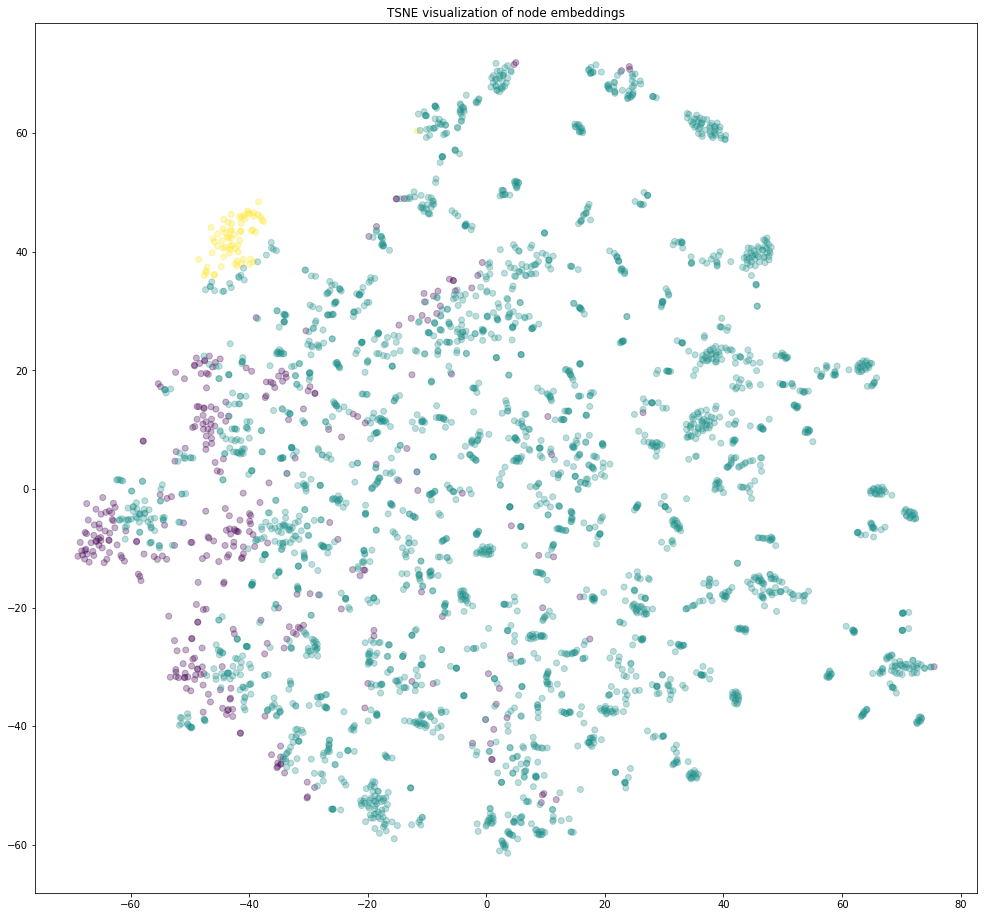

In [112]:
# draw the points

label_map = { l: i for i, l in enumerate(np.unique(df_actor))}
node_colours = [ label_map[target] for target in df_actor]

plt.figure(figsize=(20,16))
plt.axes().set(aspect="equal")
plt.scatter(node_embeddings_2d[:,0], 
            node_embeddings_2d[:,1], 
            c=node_colours, alpha=0.3)
plt.title('{} visualization of node embeddings'.format(transform.__name__))

plt.show()

**References:**
1. Clustering_Assignment_Reference Notebook
2. Stackoverflow
3. Github